<a href="https://colab.research.google.com/github/MungeliDeli/code-unza25-csc4792-project_team_17_repository/blob/main/code_unza25_csc4792_project_team_17_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Parliamentary Speaker's Rulings Classification Project**

This project aims to develop an automated text classification system to categorize Speaker's Rulings from the National Assembly of Zambia into predefined categories, enhancing accessibility for legal, parliamentary, and public use.


# **1. Business Understanding**
---


## Problem Statement
The National Assembly of Zambia generates substantial volumes of parliamentary proceedings containing Speaker's Rulings on various procedural, disciplinary, and administrative matters. Currently, accessing and categorizing these rulings for legal research, parliamentary reference, and civic education requires extensive manual effort. Legal professionals, researchers, parliamentary staff, and citizens face significant challenges in efficiently locating relevant precedents and understanding patterns in parliamentary decision-making.
### Core Problem:
There is no automated system to classify and categorize Speaker's Rulings from Zambian parliamentary proceedings, making legal and legislative information retrieval inefficient and limiting effective civic education and parliamentary research.

## 1. Business Objectives

### Primary Objectives:
1. To classify parliamentary rulings into a structured system that is simpler to analyze and
evaluate  
2. Organize speakers' rulings to improve accessibility and quick retrieval for legal
professionals, researchers, and public understanding.

### Success Criteria from Business Perspective:
- Reduce time spent by legal professionals searching for relevant rulings by at least 60%
- Enable non-experts to find and understand parliamentary rulings relevant to their interests
- Provide parliamentary staff with consistent categorization for improved procedural reference
- Support academic and policy research through structured access to historical ruling patterns

---
## 2. Data Mining Goals
### Specific Technical Objectives
1. **Build a Multi-class Classification Model:**  
   Develop a machine learning system that automatically categorizes Speaker's Rulings into predefined categories such as:
    - **Procedural Rulings** (e.g., points of order, procedural motions)
    - **Disciplinary Actions** (e.g., member conduct, sanctions)
    - **Administrative Decisions** (e.g., scheduling, resource allocation)
    - **Constitutional Interpretations** (e.g., constitutional questions, legal precedents)
    - **Debate Management** (e.g., time allocation, speaking order)

2. **Implement Natural Language Processing (NLP):**  
   Apply text mining techniques to extract meaningful features from parliamentary text documents, enabling accurate classification.

3. Create automated pipeline for new ruling classification.

**Technical Success Metrics**
* Precision: Maintain precision above 75% for each individual category to ensure reliable
categorization
* F1-Score: Target F1-score above 77% for balanced precision-recall performance
---
## 3. Project Success Criteria
### Quantitative Criteria
1. **Model Performance:** Overall classification accuracy ≥ 80%
2. **Processing Speed:** System should classify new documents within 5 seconds

### Business Impact Measures:
- Reduction in manual categorization time
- Increased usage of parliamentary information by researchers and citizens
- Improved consistency in referencing past rulings by parliamentary staff
- Enhanced accessibility of legal and legislative information for civic education

---
## 4. Project Scope
### in Scope:
- Speaker's Rulings from National Assembly of Zambia proceedings
- Text-based classification using parliamentary Hansards and official records
- English language processing
### Out of Scope:
- Rulings from other parliamentary bodies or courts
- Non-English parliamentary proceedings
- Real-time audio/video processing of parliamentary sessions
- Legal advice or interpretation of ruling implications
### Constraints:
- Data availability limited to publicly accessible parliamentary records
- Solution must be cost-effective for potential implementation by parliamentary services



#**2. Data Understanding**

This notebook performs the **Data Understanding** phase for our data mining project using Google Colab.

We work with the **Speaker’s Rulings** dataset and perfom Explorative data analysis (EDA) on the data to gain an understanding on the data

## **Goals**
- Explore structure (shape, columns, types) and preview records.
- Profile data types, basic statistics, and distributions.
- Assess data quality (missing values, duplicates, inconsistencies).
- Summarize early insights and risks that will guide later preparation and modeling.



###**Data sources**
The main source of data for this project is [**The National Assembly Website**](https://www.parliament.gov.zm/publications/rulings)

The Data is publicly available and we perfomed initial data collection by scraping the website using python scripts

The Data is in form of article with a title and abstract text,
We extracted **Title**, **text**, **context** , and **standing orders**

Then we labled each rulling text into a **category** which is our target column




###**Mount Drive for persistence of the Dataset**
This allows to access the files directly and save work permanently.

Run the code cell below. It will prompt you to authorize access to your Google Drive. Follow the on-screen instructions.

In [115]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Once mounted, you can see your entire Google Drive by navigating through the "Files" pane on the left. It will appear under the drive/MyDrive/ directory.


### **IMPORTANT NOTE**
For this project, you should create a folder in your Google Drive (e.g., `rulings_classifier_data`) and upload the  datasets into it:
>* `speaker_ruling_classification.csv`


 In this examples below, the file path used points to my own folder structure, for instance:
 >* `/content/drive/MyDrive/rulings_classifier_data`

 **You MUST replace this path with the correct path to the files in YOUR own Google Drive.** You can find the correct path by navigating to the file in the "Files" pane, right-clicking it, and selecting "Copy path".

###**Environtment Setup and Data Loading**

1. Importing the required python libraries
  - **pandas** for handling and exploring data
  - **pyplot** from matplotlib for plotting
2. Load the Speaker's Rulling dataset into a pandas DataFrame using `pd.read_csv()`

In [116]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt


#Load dataset into a DataFrame
file_path = "/content/drive/MyDrive/rulings_classifier_data/speaker_ruling_classification.csv"
ruling_df = pd.read_csv(file_path)



###**Basic Structure Analysis**   

In this step, we examine the **basic structure** of the dataset to understand its size and scope.

- **Dataset shape**: Number of rows and columns
- **Total data points**: Rows * Columns.  

This helps us estimate data volume and complexity before diving deeper.


In [117]:
#Datashape
print("Dataset shape:", ruling_df.shape)

#Number of row (rulings)
print("Number of rows(rulings):", ruling_df.shape[0])

#Number of columns (features)
print("Number of columns(features):", ruling_df.shape[1])

#Total data points
print("Total data points:", ruling_df.shape[0] * ruling_df.shape[1])


Dataset shape: (138, 5)
Number of rows(rulings): 138
Number of columns(features): 5
Total data points: 690


### **Column Structure Examination**

To better understand the dataset, we analyze its **columns and data types**:

- **`df.info()` summary** showing:  
   - Column names  
   - Number of non-null entries per column  
   - Data types of each column  
   - Memory usage  



In [118]:
#showing list of columns
print("List of columns:")
for i , col in enumerate(ruling_df.columns,start=1):
  print(f"{i}.{col}")
print("\n")



# showing a concise data summary including datatypes
print("Summary of dataset:")
ruling_df.info()

List of columns:
1.rulingTitle
2.rulingText
3.context
4.categories
5.standingOrder


Summary of dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rulingTitle    138 non-null    object
 1   rulingText     137 non-null    object
 2   context        138 non-null    object
 3   categories     130 non-null    object
 4   standingOrder  116 non-null    object
dtypes: object(5)
memory usage: 5.5+ KB


###**Initial Data Preview**

A preview the dataset to gain a general sense of its content:

- Use **`df.head()`** to view the first records.  
- Use **`df.tail()`** to view the last records.

In [119]:
#first 5 fow of the datase
ruling_df.head(13).T


,0,1,2,3,4,5,6,7,8,9,10,11,12
rulingTitle,RULING BY THE HON SECOND DEPUTY SPEAKER ON A P...,RULING BY THE HON MADAM SPEAKER ON A POINT OF ...,RULING BY THE HON MADAM SPEAKER ON A POINT OF ...,RULING BY THE HON MADAM FIRST DEPUTY SPEAKER O...,RULING BY THE HON MADAM FIRST DEPUTY SPEAKER O...,RULING BY THE HON MADAM SPEAKER ON A COMPLAINT...,RULING BY THE HON MADAM FIRST SPEAKER ON A POI...,RULING BY THE HON MADAM SPEAKER ON THE COMPLAI...,RULING BY THE HON MADAM SPEAKER ON A POINT OF ...,RULING BY THE HON MADAM SPEAKER ON A POINT OF ...,RULING BY THE HON MADAM SPEAKER ON A POINT OF ...,RULING BY THE HON MADAM SPEAKER ON A POINT OF ...,RULING BY THE HON MADAM SPEAKER ON A POINT OF ...
rulingText,"Hon Members, the House will recall that on Fri...","Hon Members, the House will recall that on Tue...",Hon Members I have a ruling to render against ...,"I order Ms J N Chisenga, Member of Parliament ...","Hon Members, I wish to inform the House that o...","I order Mr Munir Zulu, Member of Parliament fo...",Hon Members I have a ruling to render against ...,Hon Members I have a ruling to render against ...,"Hon Members, the House will recall that on Wed...","Hon Members will recall that on Thursday, 15th...","Hon Members, the House will recall that on Wed...","Hon Members will recall that on Thursday, 16th...","Hon Members will recall that on Thursday, 16th..."
context,point of order,point of order,point of order,complaint,complaint,complaint,point of order,complaint,point of order,point of order,point of order,point of order,point of order
categories,"constitutional interpretations, disciplinary a...","disciplinary actions, procedural rulings","disciplinary actions, procedural rulings","disciplinary actions, procedural rulings","disciplinary actions, procedural rulings","disciplinary actions, procedural rulings","constitutional interpretations, disciplinary a...","constitutional interpretations, disciplinary a...","constitutional interpretations, procedural rul...","disciplinary actions, procedural rulings","disciplinary actions, procedural rulings","administrative decisions, procedural rulings",procedural rulings
standingOrder,72,"203, 139","205, 140","203, 205","202, 208, 204, 205","207, 203, 205","207, 203, 204, 205, 19","202, 203, 207","84, 131, 132",203,NaN,65,"65, 131"


In [120]:
#last 5 rows of the dataset
ruling_df.tail(5).T

,133,134,135,136,137
rulingTitle,RULING BY THE HON MR SPEAKER ON A POINT OF ORD...,RULING BY THE HON MR SPEAKER ON A POINT OF ORD...,RULING BY THE HON MR SPEAKER ON A POINT OF ORD...,RULING BY THE HON MR SPEAKER ON THE POINT OF O...,RULING BY THE HON MR SPEAKER ON A POINT OF ORD...
rulingText,"Hon Members will recall that on Tuesday, 27th ...","Hon Members will recall that on Tuesday, 27th ...","Hon Members will recall that on Tuesday, 20th ...","Hon Members will recall that on Tuesday, 3rd O...","Hon Members will recall that on Tuesday, 20th ..."
context,point of order,point of order,point of order,point of order,point of order
categories,"debate management, procedural rulings","disciplinary actions, procedural rulings","disciplinary actions, procedural rulings","debate management, procedural rulings","debate management, procedural rulings"
standingOrder,NaN,25,NaN,165,165


###**Categorical Data Analysis**
In this section we dive deeper in the Categorical columns *categories and context* columns to understand the distribution  within each column

####What We'll Analyze:

> - Value counts for each categorical column
> - Number of unique values per column
> - Most and least common categories

In [121]:
#Count number of occurence for each category

print("Number of occurence for each category:")

categoriesCount = ruling_df['categories']
print(categoriesCount.value_counts())
print("\n")

Number of occurence for each category:
categories
procedural rulings                                                          68
disciplinary actions, procedural rulings                                    22
disciplinary actions                                                        22
debate management, procedural rulings                                        6
constitutional interpretations, procedural rulings                           5
constitutional interpretations, disciplinary actions, procedural rulings     3
administrative decisions, procedural rulings                                 1
administrative decisions                                                     1
constitutional interpretations, disciplinary actions                         1
constitutional interpretations                                               1
Name: count, dtype: int64




In [122]:
##Counting number of unique values in categories columns

unique_category_values = ruling_df['categories'].unique()
print("unique values in categories columns:")
print(unique_category_values)
print("\n")
print("Number of unique values in categories columns:")
print(len(unique_category_values))

unique values in categories columns:
['constitutional interpretations, disciplinary actions, procedural rulings'
 'disciplinary actions, procedural rulings'
 'constitutional interpretations, procedural rulings'
 'administrative decisions, procedural rulings' 'procedural rulings'
 'debate management, procedural rulings' nan 'disciplinary actions'
 'administrative decisions'
 'constitutional interpretations, disciplinary actions'
 'constitutional interpretations']


Number of unique values in categories columns:
11


In [123]:
#Count number of occurence for each context

print("Number of occurence for each context:")

contextsCount = ruling_df['context']
print(contextsCount.value_counts())
print("\n")

Number of occurence for each context:
context
point of order                        117
complaint                              16
guidance                                3
matter of urgent public importance      2
Name: count, dtype: int64




In [124]:
#counting number of occurencies for each context

unique_context_values = ruling_df["context"].unique()
print("unique values in context columns:")
print(unique_context_values)
print("\n")
print("Number of unique values in context columns:")
print(len(unique_context_values))

unique values in context columns:
['point of order' 'complaint' 'guidance'
 'matter of urgent public importance']


Number of unique values in context columns:
4


###**Text Length and Word Count**
This section focuses on fining:
- The text length
- Word count
- Avarage word count for all the columns with paragraph
including **rullingText** and **rullingTitle**



In [125]:
##creating a new column to hold the text length and column count for rulingTitle

ruling_df['ruling_title_text_length'] = ruling_df['rulingTitle'].str.len()
ruling_df['ruling_title_word_count'] = ruling_df['rulingTitle'].str.split().str.len()

display(ruling_df.head(2))

#finding the avarage word count and text length for the ruling title

avarage_word_count = ruling_df['ruling_title_word_count'].mean()
avarage_text_length = ruling_df['ruling_title_text_length'].mean()
print("\n")

print("Avarage word count: ", avarage_word_count.astype(int))
print("Avarage text length: ", avarage_text_length.astype(int))

,rulingTitle,rulingText,context,categories,standingOrder,ruling_title_text_length,ruling_title_word_count
0,RULING BY THE HON SECOND DEPUTY SPEAKER ON A P...,"Hon Members, the House will recall that on Fri...",point of order,"constitutional interpretations, disciplinary a...",72,276,49
1,RULING BY THE HON MADAM SPEAKER ON A POINT OF ...,"Hon Members, the House will recall that on Tue...",point of order,"disciplinary actions, procedural rulings","203, 139",348,56




Avarage word count:  51
Avarage text length:  299


###**Visual Analysis**
Using pyplot we will Create categorical visualizations
- Bar charts for top categorical variables
- Pie charts for proportional data
- Distribution plots for key categories

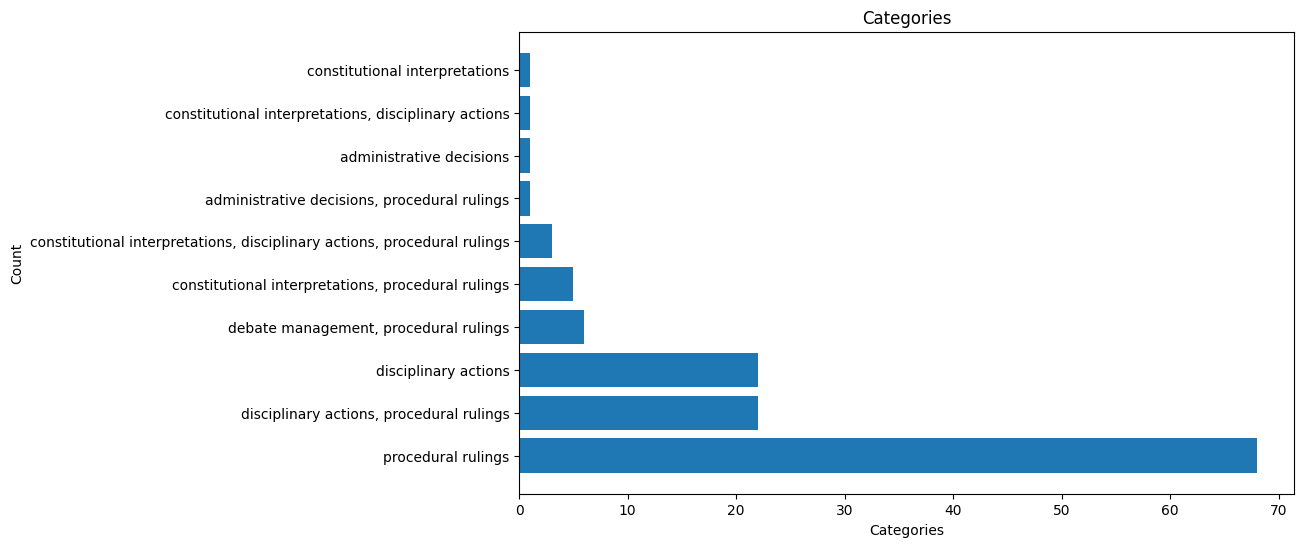

In [126]:
# creating bar chart for categories column

categoriesCount = ruling_df['categories'].value_counts()

plt.figure(figsize=(10,6))
plt.title("Categories")
plt.xlabel("Categories")
plt.ylabel("Count")

plt.barh(categoriesCount.index, categoriesCount.values)
plt.show()

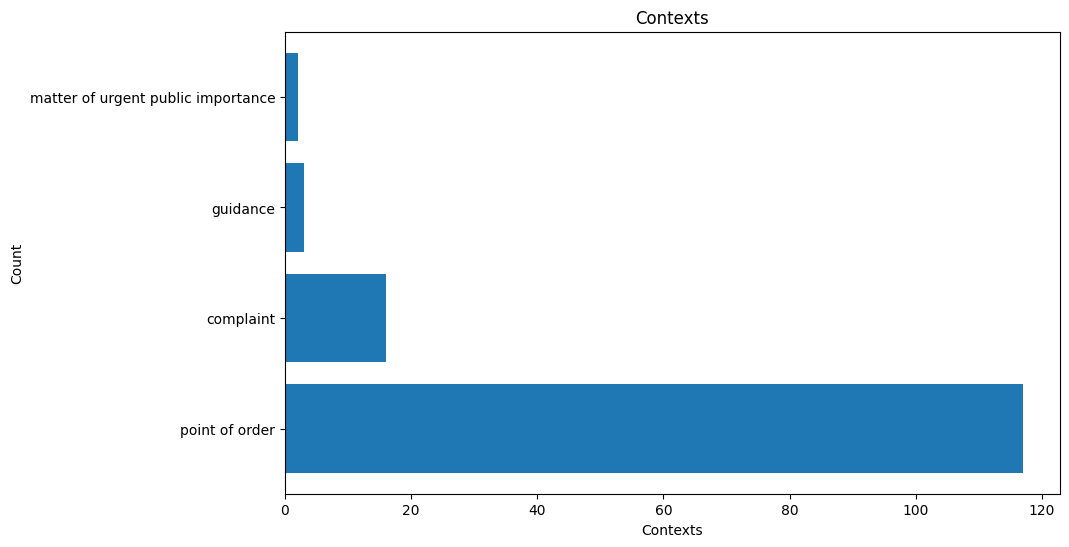

In [127]:
# creating bar chart for context column

contextCount = ruling_df['context'].value_counts()

plt.figure(figsize=(10,6))
plt.title("Contexts")
plt.xlabel("Contexts")
plt.ylabel("Count")

plt.barh(contextCount.index, contextCount.values)
plt.show()


###**Feature relevance assessment**
Based on the understand and research made upon the dataset

we have identified that

**Most important features:**
>*  **rulingText:** This is the main body of the ruling, containing the richest semantic and contextual information.
>* ***context*** is very noisy it might contribute little.
>* ***categories*** This is meant to be the target column

**Less relevant / redundant features**
>* ***rulingTitle*** might be redundatant because it may be repetitive or just rephrasing the ***rulingText*** but nonetheless it can prove usefull when ***rulingText*** is not usefull
>* ***standingOrder:*** this is potentially usefull but sparse, it contains values like 179, 53, 4 ...



#**Data Preparation**
This seciton performs the Data Preparation phase for our parliamentary Speaker's Rulings classification project.

Following the CRISP-DM methodology, this phase is critical as it directly impacts the quality of our model.

##**Goals of Data Preparation Phase**

* Data Selection: Choose relevant  features for multi-label classification
* Data Preprocessing: Clean and normalize text data for TF-IDF processing
* Data Transformation: Create model-ready features for Logistic Regression
* Multi-label Preparation: Transform categories for multi-label classification

##1. Environment Setup and Data Loading

This section is mean for setting up the preparation environment such as

* Importing the necessary libraries
> * ***pandas***
> * ***pyplot***
> * ***seaborn***
> * ***numpy***
> * ***re(regular expressions)***
> * ***nltk***

* Downloading the necesary packages such as:
> * ***punkt***
> * ***stopwors***

* Setting up to use a copy of the data set






In [128]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
import string

# Download necessary NLTK data for text preprocessing
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##2.DATA SELECTION AND CLEANING

Based on our business and  understanding we will select the most relevant features.

The Dataset has the following features:

> * **rulingTitle**
> * **rulingText**
> * **context**
> * **categories**(Target column)
> * **standingOrder**

Selected relevant columns:

> * **rulingText**(merged with ruling title)
> * **context**
> * **categories**(Target column)
> * **standingOrder**

k

In [129]:
# Create working copy to preserve original data
working_df = ruling_df.copy()

###2.1 Checking and Handling duplicates

In [130]:
#this part checks and handles duplicates by the rulingText since its te primary column

duplicate_rows = working_df['rulingText'].duplicated().sum()

print(f"Number of duplicates based on rulingText:{duplicate_rows}" )



Number of duplicates based on rulingText:6


In [131]:
#removing the duplicates
working_df.drop_duplicates(subset=['rulingText'], inplace=True)


In [132]:
#checking the number of dublicate based on all features after removing
duplicate_rows = working_df['rulingText'].duplicated().sum()

print(f"Number of duplicates after removing dublicates:{duplicate_rows}" )

Number of duplicates after removing dublicates:0


###2.2 Merging rulling text with the title
This section merges the rullingTitle and the rulingText by merging where title exists and filling with title where ruling text is missing

In [133]:

# Combine rulingTitle and rulingText into a single column
# If rulingTitle is missing, just use rulingText, if rulingText is missing, just use rulingTitle
working_df['rulingText'] = (
    working_df['rulingTitle'].fillna('') + ' ' + working_df['rulingText'].fillna('')
).str.strip()


#Drop rulingTitle
working_df = working_df.drop(columns=['rulingTitle'])


In [134]:
#checking if the merge was successful

working_df["rulingText"].iloc[4]

'RULING BY THE HON MADAM FIRST DEPUTY SPEAKER ON A COMPLAINT BY MR MUNIR ZULU, MEMBER OF PARLIAMENT FOR LUMEZI CONSTITUENCY AGAINST MR K S MICHELO, MEMBER OF PARLIAMENT FOR BWEENGWA CONSTITUENCY, AND MR C ANDELEKI, MEMBER OF PARLIAMENT FOR KATOMBOLA CONSTITUENCY, FOR ATTEMPTING TO ATTACK MR J E BANDA, MEMBER OF PARLIAMENT FOR PETAUKE CENTRAL CONSTITUENCY WHEN HE WAS ASKED TO LEAVE THE CHAMBER ON THURSDAY, 2ND NOVEMBER, 2023 AND ON A COMPLAINT BY MR M F FUBE, MEMBER OF PARLIAMENT FOR CHILUBI CONSTITUENCY AGAINST MEMBERS OF PARLIAMENT FROM THE UNITED PARTY FOR NATIONAL DEVELOPMENT (UPND) FOR THEIR CONDUCT ON THE FLOOR OF THE HOUSE AFTER MR J E BANDA, MEMBER OF PARLIAMENT FOR PETAUKE CENTRAL CONSTITUENCY WAS ASKED TO LEAVE THE HOUSE ON THURSDAY, 2ND NOVEMBER, 2023 Hon Members, I wish to inform the House that on Thursday, 30th November, 2023, the Office of the Hon Madam Speaker received two complaints. One complaint was by Mr M F Fube, Member of Parliament for Chilubi Constituency against 

###2.3 Checking and Handling missing values

In [135]:
#missing valie columns and their count
missing_values_count = working_df.isnull().sum()
missing_values_count = missing_values_count[missing_values_count > 0]

print(f"missing values before handling: {missing_values_count}")


missing values before handling: categories        7
standingOrder    22
dtype: int64


In [136]:
working_df.shape

(132, 6)

In [137]:
#all categories that are missing are to  be droped
working_df.dropna(subset=['categories'], inplace=True);

#all missing standing orders to be replaced with NaN

working_df.fillna({'standingOrder': 'NaN'}, inplace=True)

#reseting index to be continuous
working_df.reset_index(drop=True, inplace=True)

In [138]:
#7 rows must disapear
working_df.shape

(125, 6)

#3.Text Preprocessing
This section preprocess the ruling text by creating a preprocessing pipline

In [139]:
def fxn_convert_to_lowercase(var_text):
    return var_text.lower()

def fxn_remove_punctuation(var_text):
    return "".join([var_char for var_char in var_text if var_char not in string.punctuation])

def fxn_remove_stopwords(var_text):
    var_tokens = word_tokenize(var_text)
    var_stop_words = set(stopwords.words('english'))
    var_filtered_tokens = [var_word for var_word in var_tokens if var_word not in var_stop_words]
    return " ".join(var_filtered_tokens)

def fxn_stem_text(var_text):
    var_tokens = word_tokenize(var_text)
    var_stemmer = PorterStemmer()
    var_stemmed_tokens = [var_stemmer.stem(var_word) for var_word in var_tokens]
    return " ".join(var_stemmed_tokens)

def fxn_remove_numbers(var_text):
    return ''.join([i for i in var_text if not i.isdigit()])


def fxn_preprocess_text_pipeline(var_text):
    if not isinstance(var_text, str):
        return ""
    var_processed_text = fxn_convert_to_lowercase(var_text)
    var_processed_text = fxn_remove_punctuation(var_processed_text)
    var_processed_text = fxn_remove_stopwords(var_processed_text)
    var_processed_text = fxn_stem_text(var_processed_text)
    var_processed_text = fxn_remove_numbers(var_processed_text)
    return var_processed_text

working_df['rulingText'] = working_df['rulingText'].apply(fxn_preprocess_text_pipeline)
print("--- Text Pre-processing Complete ---")
working_df['rulingText'].iloc[4]

--- Text Pre-processing Complete ---


'rule hon madam first deputi speaker complaint mr munir zulu member parliament lumezi constitu mr k michelo member parliament bweengwa constitu mr c andeleki member parliament katombola constitu attempt attack mr j e banda member parliament petauk central constitu ask leav chamber thursday nd novemb  complaint mr f fube member parliament chilubi constitu member parliament unit parti nation develop upnd conduct floor hous mr j e banda member parliament petauk central constitu ask leav hous thursday nd novemb  hon member wish inform hous thursday th novemb  offic hon madam speaker receiv two complaint one complaint mr f fube member parliament chilubi constitu conduct mr k michelo member parliament bweengwa constitu mr c andeleki member parliament katombola constitu mr e mutinta member parliament itezhi tezhi constitu mr anakoka member parliament luena constitu member parliament upnd sit hous thursday nd novemb  second complaint mr munir zulu member parliament lumezi constitu conduct mr k

#4 Categorical Encoding

For the section will perform muilti hot encodin for our three categorical columns which are ***categories*** , ***context*** and ***standing order***

first is to understand this data,how it looks like and figure out the best way to encode it for the model to work with




##4.1 Understnading the categorical columns

In [140]:
#getting unique values from categories
value_count = working_df['categories'].value_counts()

print("Uniques categories and their frequencies")
print(value_count)

Uniques categories and their frequencies
categories
procedural rulings                                                          64
disciplinary actions                                                        22
disciplinary actions, procedural rulings                                    21
debate management, procedural rulings                                        6
constitutional interpretations, procedural rulings                           5
constitutional interpretations, disciplinary actions, procedural rulings     3
administrative decisions, procedural rulings                                 1
administrative decisions                                                     1
constitutional interpretations, disciplinary actions                         1
constitutional interpretations                                               1
Name: count, dtype: int64


In [141]:
#getting unique values from categories
value_count = working_df['context'].value_counts()

print("Uniques context and their frequencies")
print(value_count)

Uniques context and their frequencies
context
point of order                        111
complaint                              11
matter of urgent public importance      2
guidance                                1
Name: count, dtype: int64


In [142]:
#getting unique values from standing order
value_count = working_df['standingOrder'].value_counts()

print("Uniques standing Orders and their frequencies")
print(value_count)

Uniques standing Orders and their frequencies
standingOrder
NaN                       21
65                        21
53                         8
131                        6
203,204,205                3
132                        3
65, 131                    2
204                        2
49                         2
66                         2
205                        2
53,1                       2
134                        2
139                        2
165                        2
131,202                    2
203                        1
202, 203, 207              1
84, 131, 132               1
72                         1
203, 139                   1
131, 204                   1
207, 203, 204, 205, 19     1
202, 208, 204, 205         1
207, 203, 205              1
203, 205                   1
205, 140                   1
207,202,203                1
25, 27, 226, 132           1
210                        1
204, 205, 226              1
185                        1
203,57,63   

its very clear that the categories and the standingOrders are comma seperated and for proper encoding we will need to convert these into a list

#4.2 Converting the raw comma seperated text to a list

In [143]:
#converting categories to list for easir working
working_df['categories'] = working_df['categories'].apply(
    lambda x: [cat.strip() for cat in x.split(',')] if isinstance(x , str) else []
)

print("\n--- After Converting to Lists ---")
print(working_df['categories'])


--- After Converting to Lists ---
0      [constitutional interpretations, disciplinary ...
1             [disciplinary actions, procedural rulings]
2             [disciplinary actions, procedural rulings]
3             [disciplinary actions, procedural rulings]
4             [disciplinary actions, procedural rulings]
                             ...                        
120    [constitutional interpretations, procedural ru...
121              [debate management, procedural rulings]
122           [disciplinary actions, procedural rulings]
123              [debate management, procedural rulings]
124              [debate management, procedural rulings]
Name: categories, Length: 125, dtype: object


In [144]:
# converting standingOrder to list, ensuring the string "NaN" becomes []
working_df['standingOrder'] = working_df['standingOrder'].apply(
    lambda x: [] if isinstance(x , str) and x.strip().lower() == 'nan'
              else [cat.strip() for cat in x.split(',')] if isinstance(x , str)
              else []
)

print("\n--- After Converting to Lists ---")
print(working_df['standingOrder'])






--- After Converting to Lists ---
0                      [72]
1                [203, 139]
2                [205, 140]
3                [203, 205]
4      [202, 208, 204, 205]
               ...         
120                [70, 72]
121                      []
122                      []
123                   [165]
124                   [165]
Name: standingOrder, Length: 125, dtype: object


In [145]:
working_df.columns

Index(['rulingText', 'context', 'categories', 'standingOrder',
       'ruling_title_text_length', 'ruling_title_word_count'],
      dtype='object')

#Categorical Encoding

This section will encode the categorical columns
* The ***categories*** and the ***standingOrder*** will recieve multi hot encoding because one record can belong to multiple of them
* The context since has only one instance per record will recieve one hot encoding

In [146]:
# Use MultiLabelBinarizer from scikit learn to perform Multi-Hot Encoding on categories
from sklearn.preprocessing import MultiLabelBinarizer


# Multi-label encoding for categories
mlb = MultiLabelBinarizer()
encoded = mlb.fit_transform(working_df['categories'])
category_names = mlb.classes_
# Add prefix to column names and ensure integer type
category_encoded_df = pd.DataFrame(encoded, columns=[f'category_{col}' for col in category_names]).astype(int)




In [147]:
category_encoded_df

,category_administrative decisions,category_constitutional interpretations,category_debate management,category_disciplinary actions,category_procedural rulings
0,0,1,0,1,1
1,0,0,0,1,1
2,0,0,0,1,1
3,0,0,0,1,1
4,0,0,0,1,1
...,...,...,...,...,...
120,0,1,0,0,1
121,0,0,1,0,1
122,0,0,0,1,1
123,0,0,1,0,1


In [148]:
working_df.columns

Index(['rulingText', 'context', 'categories', 'standingOrder',
       'ruling_title_text_length', 'ruling_title_word_count'],
      dtype='object')

In [149]:
# Use MultiLabelBinarizer from scikit learn to perform Multi-Hot Encoding on standing orders and ignoring the NaN
from sklearn.preprocessing import MultiLabelBinarizer

# Multi-label encoding for standing orders
mlb = MultiLabelBinarizer()
encoded = mlb.fit_transform(working_df['standingOrder'])

# Add prefix to column names and ensure integer type
encoded_df = pd.DataFrame(encoded, columns=[f'SO_{col}' for col in mlb.classes_]).astype(int)
working_df = working_df.drop(columns=['standingOrder']).join(encoded_df)



In [150]:
working_df.columns

Index(['rulingText', 'context', 'categories', 'ruling_title_text_length',
       'ruling_title_word_count', 'SO_1', 'SO_11', 'SO_131', 'SO_132',
       'SO_134', 'SO_135', 'SO_139', 'SO_140', 'SO_145', 'SO_148', 'SO_165',
       'SO_179', 'SO_185', 'SO_19', 'SO_190', 'SO_202', 'SO_203', 'SO_204',
       'SO_205', 'SO_207', 'SO_208', 'SO_210', 'SO_226', 'SO_23', 'SO_231',
       'SO_25', 'SO_27', 'SO_28', 'SO_3', 'SO_33', 'SO_34', 'SO_4', 'SO_44',
       'SO_49', 'SO_51', 'SO_53', 'SO_57', 'SO_63', 'SO_65', 'SO_66', 'SO_69',
       'SO_70', 'SO_72', 'SO_76', 'SO_77', 'SO_84', 'SO_85', 'SO_86'],
      dtype='object')

In [151]:
#performing one hot encodin for the context
encoder = OneHotEncoder(sparse_output=False)
context_encoded = encoder.fit_transform(working_df[['context']])
context_encoded_df = pd.DataFrame(context_encoded, columns=encoder.get_feature_names_out(['context'])).astype(int)
working_df = pd.concat([working_df, context_encoded_df], axis=1)
working_df = working_df.drop(columns=['context'])


now the Categorical encoding is done this is how the data set look all together

In [152]:
working_df.head(5).T


,0,1,2,3,4
rulingText,rule hon second deputi speaker point order rai...,rule hon madam speaker point order rais tuesda...,rule hon madam speaker point order rais th mar...,rule hon madam first deputi speaker complaint ...,rule hon madam first deputi speaker complaint ...
categories,"[constitutional interpretations, disciplinary ...","[disciplinary actions, procedural rulings]","[disciplinary actions, procedural rulings]","[disciplinary actions, procedural rulings]","[disciplinary actions, procedural rulings]"
ruling_title_text_length,276,348,295,290,770
ruling_title_word_count,49,56,53,47,129
SO_1,0,0,0,0,0
SO_11,0,0,0,0,0
SO_131,0,0,0,0,0
SO_132,0,0,0,0,0
SO_134,0,0,0,0,0
SO_135,0,0,0,0,0


# 4 Text Transformation

In this step, we convert textual data into numerical representations using **Bag of Words (BoW)** and **TF-IDF**.  
We will prepare the dataset with both approaches, train the model, and then compare their accuracy to determine which performs better.  


###4.1 Data Preparation using Bag Of Words

In [153]:
#bag or words using count vectorizer
#creating a copy for the BOW dataframe
bow_encoded_df = working_df.copy()

#getting the vectorizer object
bow_vectorizer = CountVectorizer( )
bow_matrix = bow_vectorizer.fit_transform(bow_encoded_df['rulingText'])
bow_encoded_text_df = pd.DataFrame(bow_matrix.toarray(), columns=bow_vectorizer.get_feature_names_out())






###4.2 Data Preparation using TF-IDF

In [154]:

#bag or words using count vectorizer
tfidf_encoded_df = working_df.copy()

#getting the vectorizer object
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(tfidf_encoded_df['rulingText'])
tfidf_encoded_text_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())









In [155]:
tfidf_encoded_text_df.head(5)

,ab,abalati,abandon,abid,abl,abolish,aboveit,abrog,abscond,absenc,...,zambiatherefor,zctu,zealous,zesco,zfe,znbc,zr,zulu,zx,être
0,0.094249,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.021959,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.000000,0.0,0.0,0.023712,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035911,0.0,0.0


# 7. Data Preparation Summary

## What We Accomplished

### Data Selection
- Selected relevant columns for multi-label text classification  

### Quality Assessment
- Identified and handled missing values, duplicates  

### Text Preprocessing
- Merged ruling titles and text for comprehensive content  
- Implemented complete NLP pipeline:
  - Lowercasing  
  - Punctuation removal  
  - Stopword removal  
  - removal of digits
  - Stemming  

### Multi-label Preparation
- Parsed category strings, standing Order into lists  
- Applied multi-label binarization for target variables and standing orders  


### Vectorization Preparation
- Prepare the rulingText in two ways, using TF-IDF and BoW
- Both datasets will be used to train the model and see on yeilds a greater accuracy   


## Key Outputs
- **Text Corpus**: Clean, processed text ready for TF-IDF vectorization  
- **Multi-label Targets**:Multi hot encoding for all categories, standing Orders  
- **One hot encoded feature**: One hot encoding for the context feature   
- **Bag of Words matrix dataset**: dataset prepared using data BoW
- **TF-IDF matrix dataset**:  dataset prepared using data Tf-idf   




#**Modeling**

In this phase, we focus on building predictive models using the data representations prepared during the **Data Preparation** stage.  
Since our problem is **multi-label text classification**, we will experiment with different feature extraction methods and classification algorithms, then evaluate their performance.

### Feature Representations
We prepared the textual data using two common encoding techniques:
- **Bag of Words (BoW):**
- **TF-IDF (Term Frequency – Inverse Document Frequency)**

### Modeling Algorithms
we use **Logistic Regression (One-vs-Rest):**  to as our model

### Objective
For this project, we streamline the workflow by **training and evaluating models in the same step**.  

The model is trained on  text representations and the combined dataset including context and standing orders, and then its performance is assessed using standard multi-label metrics such as:

- **Classification Report** (Precision, Recall, F1-score, Support)  
- **Hamming Loss**  
- **Jaccard Score (micro and macro)**  
- **Confusion Matrices** for deeper error analysis  

This approach allows us to directly compare model effectiveness across different data representations and identify the best-performing combination for our task.


In [156]:
#importing necessary dataset
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, multilabel_confusion_matrix, hamming_loss, jaccard_score
import matplotlib.pyplot as plt
import seaborn as sns

#Using BoW encoded dataset
We assign the Bag-of-Words encoded features as `X` and the multi-label categories as `y` for modeling.


In [157]:
#Assing the independent featuer and the target lable
X = bow_encoded_text_df  #this is the independedn features
y = category_encoded_df  #this is the target label dataset

The dataset is split into training (70%) and testing (30%) sets to evaluate model performance on unseen data.


In [158]:
#Test/Train Split
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.3, random_state=42
)

###Train a **One-vs-Rest Logistic Regression model** on BoW features to handle multi-label classification.


In [159]:
#train the Model
#looking at the fact that our data is multi labled we will use One-vs-Rest Logistic Regression
bow_model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
bow_model.fit(X_train , y_train)
#predict the daa using the training X data
y_pred_bow =  bow_model.predict(X_test)

print(classification_report(y_test, y_pred_bow, target_names=category_names ,     zero_division=0))
print("Hamming Loss:", hamming_loss(y_test, y_pred_bow))
print("Jaccard Score (micro):", jaccard_score(y_test, y_pred_bow, average="micro"))
print("Jaccard Score (macro):", jaccard_score(y_test, y_pred_bow, average="macro"))


                                precision    recall  f1-score   support

      administrative decisions       0.00      0.00      0.00         1
constitutional interpretations       1.00      0.50      0.67         2
             debate management       0.00      0.00      0.00         2
          disciplinary actions       0.45      0.38      0.42        13
            procedural rulings       0.94      0.88      0.91        34

                     micro avg       0.82      0.69      0.75        52
                     macro avg       0.48      0.35      0.40        52
                  weighted avg       0.77      0.69      0.72        52
                   samples avg       0.78      0.71      0.72        52

Hamming Loss: 0.12631578947368421
Jaccard Score (micro): 0.6
Jaccard Score (macro): 0.3192982456140351


###Logistic Regression is trained with balanced class weights to address label imbalance in the dataset.


In [160]:
#train the Model
#looking at the fact that our data is multi labled we will use One-vs-Rest Logistic Regression using class_weight='balanced'

bow_model_balanced = OneVsRestClassifier(LogisticRegression(max_iter=1000 ,class_weight='balanced'))
bow_model_balanced.fit(X_train , y_train)

#predict the daa using the training X data
y_pred_bow_balanced =  bow_model_balanced.predict(X_test)


print(classification_report(y_test, y_pred_bow_balanced, target_names=category_names ,     zero_division=0))
print("Hamming Loss:", hamming_loss(y_test, y_pred_bow_balanced))
print("Jaccard Score (micro):", jaccard_score(y_test, y_pred_bow_balanced, average="micro"))
print("Jaccard Score (macro):", jaccard_score(y_test, y_pred_bow_balanced, average="macro"))




                                precision    recall  f1-score   support

      administrative decisions       0.00      0.00      0.00         1
constitutional interpretations       0.50      0.50      0.50         2
             debate management       0.00      0.00      0.00         2
          disciplinary actions       0.45      0.38      0.42        13
            procedural rulings       0.94      0.88      0.91        34

                     micro avg       0.80      0.69      0.74        52
                     macro avg       0.38      0.35      0.37        52
                  weighted avg       0.75      0.69      0.72        52
                   samples avg       0.76      0.71      0.71        52

Hamming Loss: 0.13157894736842105
Jaccard Score (micro): 0.5901639344262295
Jaccard Score (macro): 0.28596491228070176


#Using TF-IDF encoded dataset
We assign the TF-IDF encoded features as `X` and the multi-label categories as `y` for modeling.


In [161]:
#Assing the independent featuer and the target lable
X = tfidf_encoded_text_df  #this is the independedn features
y = category_encoded_df  #this is the target label dataset

The dataset is split into training (70%) and testing (30%) sets to evaluate model performance on unseen data.


In [162]:
#Test/Train Split ]
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.3, random_state=42
)

###Logistic Regression is trained with balanced class weights to address label imbalance in the TF-IDF data.


In [163]:
#train the Model
#looking at the fact that our data is multi labled we will use One-vs-Rest Logistic Regression using class_weight='balanced'

tfidf_model_balanced = OneVsRestClassifier(LogisticRegression(max_iter=1000 ,class_weight='balanced'))
tfidf_model_balanced.fit(X_train , y_train)

#predict the daa using the training X data
y_pred_tfidf_balanced =  tfidf_model_balanced.predict(X_test)


print(classification_report(y_test, y_pred_tfidf_balanced, target_names=category_names ,     zero_division=0))
print("Hamming Loss:", hamming_loss(y_test, y_pred_tfidf_balanced))
print("Jaccard Score (micro):", jaccard_score(y_test, y_pred_tfidf_balanced, average="micro"))
print("Jaccard Score (macro):", jaccard_score(y_test, y_pred_tfidf_balanced, average="macro"))



                                precision    recall  f1-score   support

      administrative decisions       0.00      0.00      0.00         1
constitutional interpretations       0.50      0.50      0.50         2
             debate management       0.00      0.00      0.00         2
          disciplinary actions       0.50      0.62      0.55        13
            procedural rulings       0.93      0.79      0.86        34

                     micro avg       0.77      0.69      0.73        52
                     macro avg       0.39      0.38      0.38        52
                  weighted avg       0.75      0.69      0.72        52
                   samples avg       0.78      0.72      0.72        52

Hamming Loss: 0.14210526315789473
Jaccard Score (micro): 0.5714285714285714
Jaccard Score (macro): 0.2928571428571428


###Combining Bow prepared rulingText (**bow_encoded_text_df**) with the rest of the input columns the **context**, and **standingOrder**

In [164]:
##dataset with all the data
working_df.columns

Index(['rulingText', 'categories', 'ruling_title_text_length',
       'ruling_title_word_count', 'SO_1', 'SO_11', 'SO_131', 'SO_132',
       'SO_134', 'SO_135', 'SO_139', 'SO_140', 'SO_145', 'SO_148', 'SO_165',
       'SO_179', 'SO_185', 'SO_19', 'SO_190', 'SO_202', 'SO_203', 'SO_204',
       'SO_205', 'SO_207', 'SO_208', 'SO_210', 'SO_226', 'SO_23', 'SO_231',
       'SO_25', 'SO_27', 'SO_28', 'SO_3', 'SO_33', 'SO_34', 'SO_4', 'SO_44',
       'SO_49', 'SO_51', 'SO_53', 'SO_57', 'SO_63', 'SO_65', 'SO_66', 'SO_69',
       'SO_70', 'SO_72', 'SO_76', 'SO_77', 'SO_84', 'SO_85', 'SO_86',
       'context_complaint', 'context_guidance',
       'context_matter of urgent public importance', 'context_point of order'],
      dtype='object')

In [165]:
#remove the columns rulingText  ruling_title_text_length  ruling_title_word_count
cols_to_remove = ['rulingText','ruling_title_text_length', 'ruling_title_word_count','categories' ]
new_df = working_df.drop(cols_to_remove , axis=1)
print(new_df.columns)

Index(['SO_1', 'SO_11', 'SO_131', 'SO_132', 'SO_134', 'SO_135', 'SO_139',
       'SO_140', 'SO_145', 'SO_148', 'SO_165', 'SO_179', 'SO_185', 'SO_19',
       'SO_190', 'SO_202', 'SO_203', 'SO_204', 'SO_205', 'SO_207', 'SO_208',
       'SO_210', 'SO_226', 'SO_23', 'SO_231', 'SO_25', 'SO_27', 'SO_28',
       'SO_3', 'SO_33', 'SO_34', 'SO_4', 'SO_44', 'SO_49', 'SO_51', 'SO_53',
       'SO_57', 'SO_63', 'SO_65', 'SO_66', 'SO_69', 'SO_70', 'SO_72', 'SO_76',
       'SO_77', 'SO_84', 'SO_85', 'SO_86', 'context_complaint',
       'context_guidance', 'context_matter of urgent public importance',
       'context_point of order'],
      dtype='object')


In [166]:
#combining data and taking into account the fact that bow_encoded_text_df is sparse and the new_df is a densematrix
#we use the   scipy library to combine
from scipy.sparse import hstack, csr_matrix

# Convert dense DataFrame to sparse
new_sparse = csr_matrix(new_df.values)

# Combine with BoW sparse matrix
combined_df = hstack([bow_encoded_text_df, new_sparse])



In [167]:
#Assing the independent featuer and the target lable
X = combined_df  #this is the independedn features
y = category_encoded_df  #this is the target label dataset
#Test/Train Split ]
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.3, random_state=42
)

###Train a **One-vs-Rest Logistic Regression model** on combined dataset with balanced class weights

In [168]:

combined_model_balanced = OneVsRestClassifier(LogisticRegression(max_iter=1000 , class_weight='balanced'))
combined_model_balanced.fit(X_train , y_train)
#predict the daa using the training X data
y_pred_combined =  combined_model_balanced.predict(X_test)
print(classification_report(y_test, y_pred_combined, target_names=category_names ,     zero_division=0))
print("Hamming Loss:", hamming_loss(y_test, y_pred_combined))
print("Jaccard Score (micro):", jaccard_score(y_test, y_pred_combined, average="micro"))
print("Jaccard Score (macro):", jaccard_score(y_test, y_pred_combined, average="macro"))

                                precision    recall  f1-score   support

      administrative decisions       0.00      0.00      0.00         1
constitutional interpretations       0.50      0.50      0.50         2
             debate management       0.00      0.00      0.00         2
          disciplinary actions       0.45      0.38      0.42        13
            procedural rulings       0.94      0.88      0.91        34

                     micro avg       0.80      0.69      0.74        52
                     macro avg       0.38      0.35      0.37        52
                  weighted avg       0.75      0.69      0.72        52
                   samples avg       0.76      0.71      0.71        52

Hamming Loss: 0.13157894736842105
Jaccard Score (micro): 0.5901639344262295
Jaccard Score (macro): 0.28596491228070176


#**Evaluation**

### Evaluation of Multi-Label Text Classification Models
In this phase, we assess the performance of the models trained during the Modeling phase.

We evaluate Logistic Regression (with and without `class_weight='balanced'`), using BoW, TF-IDF, and combined datasets.
Key metrics include:

- Precision, Recall, F1-Score per label
- Micro and Macro averages
- Hamming Loss (fraction of misclassified labels)
- Jaccard Score (overlap between predicted and true label sets)

We also provide interpretation of results, highlight challenges due to insufficient and imbalanced data, and draw conclusions about the best-performing configuration.

### 1. Performance Summary
- **BoW + Logistic Regression (balanced):** moderate performance on procedural rulings and disciplinary actions, but poor on rare classes like administrative decisions and debate management.
- **TF-IDF + Logistic Regression (balanced):** slight improvement in label-level recall, but still struggles with rare categories.
- **Combined BoW + Context + Standing Order:** no substantial improvement, suggesting that simply concatenating additional features did not compensate for limited labeled data.

**Observation:** Rare labels consistently have low precision and recall. This indicates data scarcity as the main bottleneck.

### 2. Confusion Matrix Analysis
We can visualize per-label confusion matrices to understand where the model confuses classes.
Multi-label classification requires `multilabel_confusion_matrix`, which outputs one confusion matrix per label.

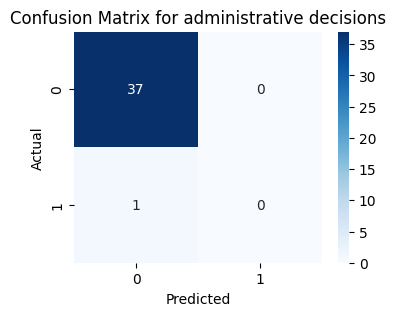

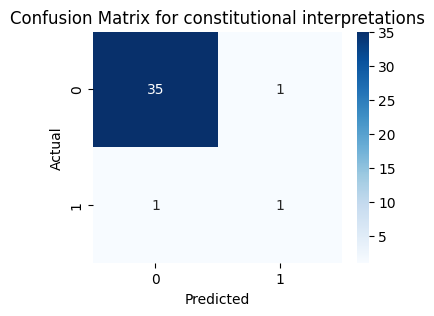

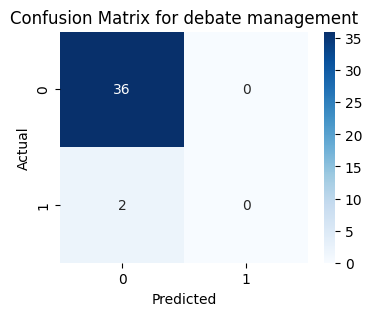

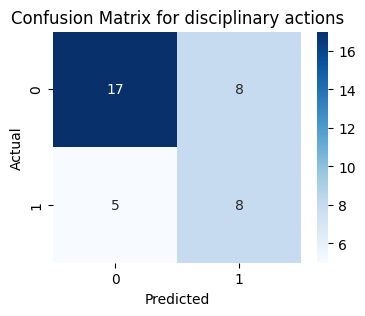

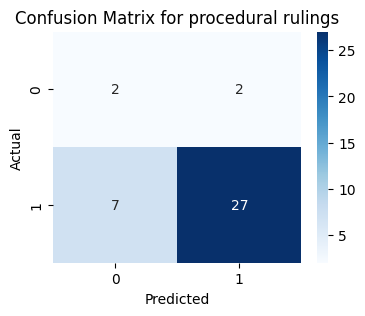

In [169]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#Generate multilabel confusion matrices

conf_matrices = multilabel_confusion_matrix(y_test, y_pred_tfidf_balanced)

for idx, label in enumerate(category_names):
  plt.figure(figsize=(4,3))
  sns.heatmap(conf_matrices[idx], annot=True, fmt="d", cmap="Blues")
  plt.title(f'Confusion Matrix for {label}')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

### 3. Interpretation of Metrics
- **High micro-average scores:** indicate that the model predicts the most frequent labels well.
- **Low macro-average scores:** reflect poor performance on rare labels.
- **Hamming Loss ~0.13–0.15:** about 13–15% of all labels are incorrectly predicted, acceptable for a small dataset but improvable.
- **Jaccard Score (micro 0.56–0.58):** partial overlap between predicted and true labels, suggesting the model captures some label patterns but not perfectly.

###4. ROC Curve Analysis

To further evaluate our multi-label classification performance, we use ROC (Receiver Operating Characteristic) curves.  
- Each curve plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** for one class.  
- The **Area Under the Curve (AUC)** is a key indicator:  
  - AUC = 1.0 → Perfect classification  
  - AUC = 0.5 → No better than random guessing  

For multi-label tasks, we interpret both **per-class ROC curves** and **macro/micro-averaged ROC curves** to get an overall view of the classifier's discriminative ability across all labels.


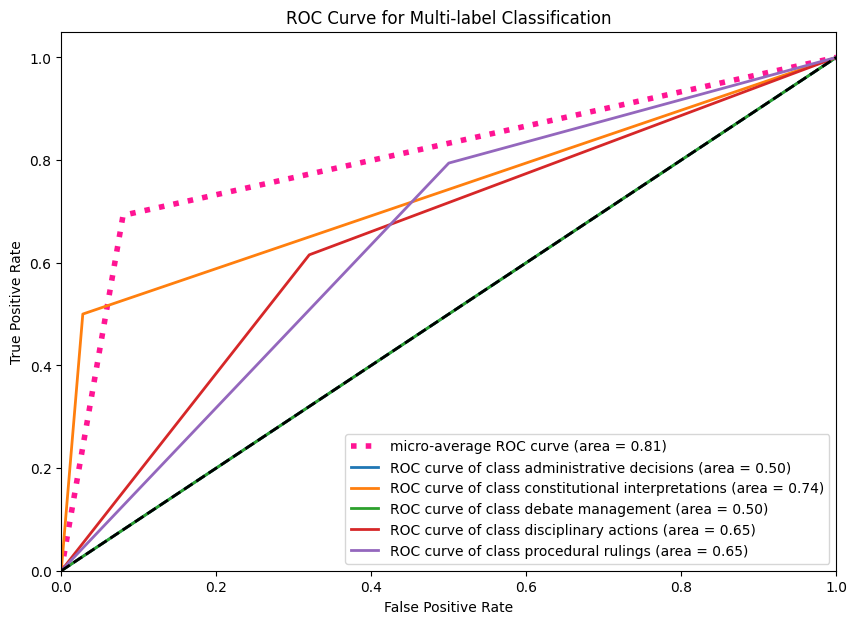

In [170]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output (already multilabel, but just ensuring for ROC)
y_test_bin = np.array(y_test)
y_pred_bin = np.array(y_pred_tfidf_balanced)

n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot all ROC curves
plt.figure(figsize=(10, 7))

# Micro-average ROC
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (area = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

# Individual class ROC curves
colors = plt.cm.tab10.colors  # for distinct colors
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label=f"ROC curve of class {category_names[i]} (area = {roc_auc[i]:.2f})",
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-label Classification")
plt.legend(loc="lower right")
plt.show()




- The ROC curves show how well the classifier distinguishes between positive and negative cases for each category.  
- Curves closer to the **top-left corner** indicate stronger performance.  
- The **micro-average ROC** summarizes overall performance across all labels.  
- AUC values above **0.70** suggest reasonable discriminative ability, while values above **0.85** indicate strong performance.


### 5. Challenges Identified
- **Insufficient data:** rare classes like administrative decisions and debate management have very few samples.
- **Class imbalance:** most samples are procedural rulings or disciplinary actions, skewing model predictions.
- **Feature limitations:** combining BoW with contextual categorical features did not significantly boost performance.

 - Models struggle to predict multiple labels simultaneously when data is limited.

### 6. Conclusion
- **Logistic Regression with `class_weight='balanced'`** generally performs best for the frequent labels.
- Rare labels remain poorly predicted due to insufficient training data.
- Adding context and standing orders as features does not drastically improve results in the current dataset.


# **Deployment**

The **Deployment phase** is where the trained model and supporting tools are made available for practical use.  
In this project, the task was to classify *Speaker Rulings* into categories such as **disciplinary actions**, **procedural rulings**, **administrative decisions**, **debate management**, and **constitutional interpretations**.

A key requirement for deployment is ensuring that both the **trained model** and the **vectorizer** (used to transform raw text into numerical features) are used together.  



## **1.Model and the Vectorizer**

When deploying a text classification system:

1. **The Vectorizer** (using TF-IDF ) transforms input text into the numerical representation used for training.  
2. **The Model** uses these transformed features to make predictions.  



In [171]:
# 1. Load Test Data
test_file_path = "/content/drive/MyDrive/rulings_classifier_data/speaker_ruling_classification_test.csv"
test_df = pd.read_csv(test_file_path)

# 2. Preprocess Test Data
# Merging title and text (if title exists)
test_df['rulingText'] = test_df['rulingTitle'].fillna('') + ' ' + test_df['rulingText'].fillna('')
test_df['rulingText'] = test_df['rulingText'].str.strip()

# applying the preprocessing pipeline to rulingText
test_df['rulingText_cleaned'] = test_df['rulingText'].apply(fxn_preprocess_text_pipeline)

# handlling missing values in categories for actual categories
test_df.dropna(subset=['categories'], inplace=True)
test_df.reset_index(drop=True, inplace=True)

# Converting actual categories to lists for comparison
test_df['categories_list'] = test_df['categories'].apply(
    lambda x: [cat.strip() for cat in x.split(',')] if isinstance(x , str) else []
)

# 3. Transform Test Data
# Use the fitted tfidf_vectorizer to transform the cleaned rulingText
test_transformed_text = tfidf_vectorizer.transform(test_df['rulingText_cleaned'])

# 4. Predict Categories
# Make predictions using the trained tfidf_model_balanced
test_predictions_encoded = tfidf_model_balanced.predict(test_transformed_text)

# 5. Decode Predictions using mlb
mlb = MultiLabelBinarizer()
mlb.fit([category_names])
test_predicted_categories = mlb.inverse_transform(test_predictions_encoded)


# 6. Display Results in a table
results_list = []
for index, row in test_df.iterrows():
    results_list.append({
        'Ruling Title': row['rulingTitle'],
        'Actual Categories': row['categories_list'],
        'Predicted Categories': list(test_predicted_categories[index]) # Convert tuple to list for cleaner display
    })

results_df = pd.DataFrame(results_list)
display(results_df)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,Ruling Title,Actual Categories,Predicted Categories
0,RULING BY THE HONOURABLE MADAM SPEAKER ON A PO...,"[disciplinary actions, procedural rulings]",[procedural rulings]
1,Ruling by Hon Madam Speaker - On a Point of Or...,"[disciplinary actions, procedural rulings]","[constitutional interpretations, disciplinary ..."
2,RULING BY THE HONOURABLE MADAM SPEAKER ON A PO...,"[constitutional interpretations, procedural ru...",[procedural rulings]
3,RULING BY THE HON MADAM FIRST DEPUTY SPEAKER O...,[procedural rulings],[procedural rulings]
4,RULING BY THE HONOURABLE MADAM FIRST DEPUTY SP...,"[disciplinary actions, procedural rulings]","[disciplinary actions, procedural rulings]"


## **Key Observations**

-  The model successfully recognized **procedural rulings** in almost all relevant cases.  
-  In some examples, the model **missed one of the categories** (partial match).  
-  The model predicted **extra categories** not present   
- Overall, the model performs well on **majority categories** but struggles with **minority or overlapping categories**.  



## **Conclusion**

- The deployed system can now classify new ruling texts into categories using the saved **model** and **vectorizer**.  
- Results demonstrate **strong baseline performance**, especially for frequently occurring categories.  
- However, improvements are needed for **multi-label handling** and **minority categories**.  
